## Data Preprocessing

This is the first step that we would going through in this project. Data processing ca be dull and time consuming.
but it's one of the most important part of Data Science project. 
What we going through is basically we would take a look at the raw data.
and we would decide which data we should keep and which data we shhould throw out.

I retrieve this data from [Kaggle](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied).

you can check out your self and make your own project with it.

**Note: This project is only for learning purposes. I did not make any profit or has any affiliations with anyone.**

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import pickle
%matplotlib inline

Let's first take a look of the first 5 rows of the data.

In [2]:
df = pd.read_csv('SBAnational.csv', encoding="UTF-8")
df.head(5)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
#Dropping some columns that are irrelevant to the classification model
df = df.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalFY', 
              'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
             'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'], axis=1)

In [4]:
df.head()

,NAICS,ApprovalDate,Term,NoEmp,NewExist,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status
0,451120,28-Feb-97,84,4,2.0,Y,NaN,28-Feb-99,"$60,000.00",P I F
1,722410,28-Feb-97,60,2,2.0,Y,NaN,31-May-97,"$40,000.00",P I F
2,621210,28-Feb-97,180,7,1.0,N,NaN,31-Dec-97,"$287,000.00",P I F
3,0,28-Feb-97,60,2,1.0,Y,NaN,30-Jun-97,"$35,000.00",P I F
4,0,28-Feb-97,240,14,1.0,N,NaN,14-May-97,"$229,000.00",P I F


In [5]:
#Make the column with date to be in date time format
#The exclussion of the data after 2010 is to consider th recession in the US

df['ApprovalDate'] = pd.to_datetime(df.ApprovalDate, dayfirst=True)
df['ApprovalDate'] = df['ApprovalDate'].dt.strftime('%Y-%m-%d')
df['DisbursementDate'] = pd.to_datetime(df.DisbursementDate, dayfirst=True)
df['DisbursementDate'] = df['DisbursementDate'].dt.strftime('%Y-%m-%d')
df = df.loc[df['ApprovalDate']<'2011-01-01'] #Excluded when it's after 2010
df = df.loc[df['DisbursementDate']<'2011-01-01'] #Excluded when it's after 2010
df.head()

,NAICS,ApprovalDate,Term,NoEmp,NewExist,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status
0,451120,1997-02-28,84,4,2.0,Y,NaN,1999-02-28,"$60,000.00",P I F
1,722410,1997-02-28,60,2,2.0,Y,NaN,1997-05-31,"$40,000.00",P I F
2,621210,1997-02-28,180,7,1.0,N,NaN,1997-12-31,"$287,000.00",P I F
3,0,1997-02-28,60,2,1.0,Y,NaN,1997-06-30,"$35,000.00",P I F
4,0,1997-02-28,240,14,1.0,N,NaN,1997-05-14,"$229,000.00",P I F


In [6]:
#the Great Recession (Loans disbursed within the time from December 2007 to June 2009)
conditions = [
    (df['DisbursementDate']<'2007-12-01'),
    (df['DisbursementDate']>'2007-11-30') & (df['DisbursementDate']<'2009-07-01'),
    (df['DisbursementDate']>'2009-06-30')
]
values = ['No Recession', 'Recession', 'No Recession']
df['RecessionOrNo'] = np.select(conditions, values) 

In [7]:
df['RecessionOrNo'].value_counts()

No Recession    824401
Recession        52588
Name: RecessionOrNo, dtype: int64

In [8]:
df = df.join(pd.get_dummies(df['RecessionOrNo']))

In [9]:
df = df.drop(['RecessionOrNo'], axis=1)
df.head()

,NAICS,ApprovalDate,Term,NoEmp,NewExist,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,No Recession,Recession
0,451120,1997-02-28,84,4,2.0,Y,NaN,1999-02-28,"$60,000.00",P I F,1,0
1,722410,1997-02-28,60,2,2.0,Y,NaN,1997-05-31,"$40,000.00",P I F,1,0
2,621210,1997-02-28,180,7,1.0,N,NaN,1997-12-31,"$287,000.00",P I F,1,0
3,0,1997-02-28,60,2,1.0,Y,NaN,1997-06-30,"$35,000.00",P I F,1,0
4,0,1997-02-28,240,14,1.0,N,NaN,1997-05-14,"$229,000.00",P I F,1,0


In [10]:
df.dropna(subset=['MIS_Status'], inplace = True)

le = preprocessing.LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['MIS_Status'])

<AxesSubplot:title={'center':'Loan Status'}, ylabel='Counts'>

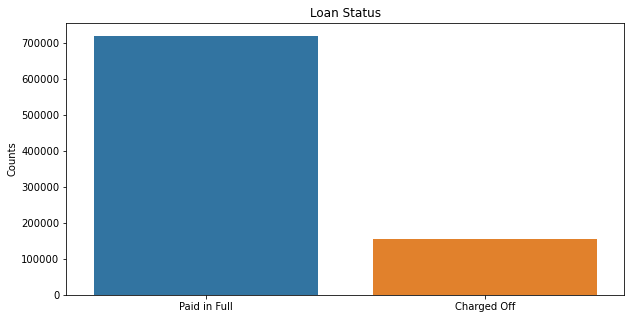

In [11]:
pifvalue = df["Loan_Status"].value_counts()[1]
coffvalue = df["Loan_Status"].value_counts()[0]
data = {"Counts":[pifvalue, coffvalue]}
loan_status = pd.DataFrame(data, index=['Paid in Full', 'Charged Off'])

plt.figure(figsize=(10, 5))
plt.title("Loan Status")
sns.barplot(x=loan_status.index, y=loan_status.Counts)

In [12]:
#Term of the loan is a function of the expected lifetime of the assets, loans backed by real estate will have terms
# 20 years or greater (240 months) and are the only loans
# granted for such a long term, whereas loans not backed by real
# estate will have terms less than 20 years (<240 months).
df['OwnRealEstate'] = df['Term'].apply(lambda x: 'RealEstate' if x>239 else 'NoRealEstate')
df['OwnRealEstate'].value_counts()

NoRealEstate    724925
RealEstate      150289
Name: OwnRealEstate, dtype: int64

In [13]:
df = df.join(pd.get_dummies(df['OwnRealEstate']))

In [14]:
df = df.drop(columns=['OwnRealEstate', 'MIS_Status'], axis=1)
df.head()

,NAICS,ApprovalDate,Term,NoEmp,NewExist,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,No Recession,Recession,Loan_Status,NoRealEstate,RealEstate
0,451120,1997-02-28,84,4,2.0,Y,NaN,1999-02-28,"$60,000.00",1,0,1,1,0
1,722410,1997-02-28,60,2,2.0,Y,NaN,1997-05-31,"$40,000.00",1,0,1,1,0
2,621210,1997-02-28,180,7,1.0,N,NaN,1997-12-31,"$287,000.00",1,0,1,1,0
3,0,1997-02-28,60,2,1.0,Y,NaN,1997-06-30,"$35,000.00",1,0,1,1,0
4,0,1997-02-28,240,14,1.0,N,NaN,1997-05-14,"$229,000.00",1,0,1,0,1


In [15]:
# Let's categorized the column "Term" to short (3-5 years (<=60 months)) and long (5-25 years(>60 months))
print("missing values in Term: ", df['Term'].isna().sum())
df['Term'] = df['Term'].apply(lambda x: "Short Term" if x<=60 else "Long Term")
df['Term'].value_counts()

missing values in Term:  0


Long Term     617436
Short Term    257778
Name: Term, dtype: int64

In [16]:
df = df.join(pd.get_dummies(df['Term']))

In [17]:
df = df.drop(['Term'], axis=1)
df.head()

,NAICS,ApprovalDate,NoEmp,NewExist,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,No Recession,Recession,Loan_Status,NoRealEstate,RealEstate,Long Term,Short Term
0,451120,1997-02-28,4,2.0,Y,NaN,1999-02-28,"$60,000.00",1,0,1,1,0,1,0
1,722410,1997-02-28,2,2.0,Y,NaN,1997-05-31,"$40,000.00",1,0,1,1,0,0,1
2,621210,1997-02-28,7,1.0,N,NaN,1997-12-31,"$287,000.00",1,0,1,1,0,1,0
3,0,1997-02-28,2,1.0,Y,NaN,1997-06-30,"$35,000.00",1,0,1,1,0,0,1
4,0,1997-02-28,14,1.0,N,NaN,1997-05-14,"$229,000.00",1,0,1,0,1,1,0


In [18]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace(',', '').str.replace('$', '').astype('float')

<ipython-input-18-d0254a3271a1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace(',', '').str.replace('$', '').astype('float')


In [19]:
df['LowDoc'] = np.where(df['DisbursementGross']<=150000, 'N', df['LowDoc'])
df['LowDoc'] = np.where(df['DisbursementGross']>150000, 'Y', df['LowDoc'])

In [20]:
#Made a new column based on LowDoc column named Risk LowDoc = N:High Risk Y:Low Risk
df['Risk'] = np.where(df['LowDoc']=='N', 'High Risk', 'Low Risk')
df = df.join(pd.get_dummies(df['Risk']))

In [21]:
df = df.drop(['Risk'], axis=1)
df.head()

,NAICS,ApprovalDate,NoEmp,NewExist,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,No Recession,Recession,Loan_Status,NoRealEstate,RealEstate,Long Term,Short Term,High Risk,Low Risk
0,451120,1997-02-28,4,2.0,N,NaN,1999-02-28,60000.0,1,0,1,1,0,1,0,1,0
1,722410,1997-02-28,2,2.0,N,NaN,1997-05-31,40000.0,1,0,1,1,0,0,1,1,0
2,621210,1997-02-28,7,1.0,Y,NaN,1997-12-31,287000.0,1,0,1,1,0,1,0,0,1
3,0,1997-02-28,2,1.0,N,NaN,1997-06-30,35000.0,1,0,1,1,0,0,1,1,0
4,0,1997-02-28,14,1.0,Y,NaN,1997-05-14,229000.0,1,0,1,0,1,1,0,0,1


In [22]:
#We make new columns based on the column NAICS which are the type of industry they are
import regex as re
def naics(text):
    text = re.sub('^11\d+', 'Agriculture, forestry, fishing and hunting', text)
    text = re.sub('^21\d+', 'Mining, quarrying, and oil and gas extraction', text)
    text = re.sub('^22\d+', 'Utilities', text)
    text = re.sub('^23\d+', 'Construction', text)
    text = re.sub('^31\d+|^32\d+|^33\d+', 'Manufacturing', text)
    text = re.sub('^42\d+', 'Wholesale trade', text)
    text = re.sub('^44\d+|^45\d+', 'Retail trade', text)
    text = re.sub('^48\d+|^49\d+', 'Transportation and warehousing', text)
    text = re.sub('^51\d+', 'Information', text)
    text = re.sub('^52\d+', 'Finance and insurance', text)
    text = re.sub('^53\d+', 'Real estate and rental and leasing', text)
    text = re.sub('^54\d+', 'Professional, scientific, and technical services', text)
    text = re.sub('^55\d+', 'Management of companies and enterprises', text)
    text = re.sub('^56\d+', 'Administrative and support', text)
    text = re.sub('^61\d+', 'Educational services', text)
    text = re.sub('^62\d+', 'Health care and social assistance', text)
    text = re.sub('^71\d+', 'Arts, entertainment, and recreation', text)
    text = re.sub('^72\d+', 'Accommodation and food services', text)
    text = re.sub('^81\d+', 'Other services (except public administration)', text)
    text = re.sub('^92\d+', 'Public administration', text)
    text = re.sub('^0', 'Others', text)
    return text

df['Industry'] = df['NAICS'].astype('string').apply(lambda x: naics(x))
# df['Industry'].value_counts()    

In [23]:
#We rationalized when a business owner trying to take a loan worth more than 150k than the business is longer than 2 years
df['NewExist'] = np.where(df['LowDoc']=='N', 'Old Business', 'New Business')
df['NewExist'].value_counts()

Old Business    568194
New Business    307020
Name: NewExist, dtype: int64

In [24]:
df = df.join(pd.get_dummies(df['NewExist']))

In [25]:
df = df.drop(columns=['LowDoc', 'NewExist'], axis=1)
df.head()

,NAICS,ApprovalDate,NoEmp,ChgOffDate,DisbursementDate,DisbursementGross,No Recession,Recession,Loan_Status,NoRealEstate,RealEstate,Long Term,Short Term,High Risk,Low Risk,Industry,New Business,Old Business
0,451120,1997-02-28,4,NaN,1999-02-28,60000.0,1,0,1,1,0,1,0,1,0,Retail trade,0,1
1,722410,1997-02-28,2,NaN,1997-05-31,40000.0,1,0,1,1,0,0,1,1,0,Accommodation and food services,0,1
2,621210,1997-02-28,7,NaN,1997-12-31,287000.0,1,0,1,1,0,1,0,0,1,Health care and social assistance,1,0
3,0,1997-02-28,2,NaN,1997-06-30,35000.0,1,0,1,1,0,0,1,1,0,Others,0,1
4,0,1997-02-28,14,NaN,1997-05-14,229000.0,1,0,1,0,1,1,0,0,1,Others,1,0


In [26]:
#We would define the business size based on the number of employees
conditions=[
    (df['NoEmp'] < 10),
    (df['NoEmp'] > 9) & (df['NoEmp'] < 50),
    (df['NoEmp'] > 49) & (df['NoEmp'] < 250),
    (df['NoEmp'] > 249)
]
values = ['Micro', 'Small', 'Medium', 'Large']
df['BusinessSize'] = np.select(conditions, values)

In [27]:
df['BusinessSize'].value_counts()

Micro     633301
Small     211626
Medium     28989
Large       1298
Name: BusinessSize, dtype: int64

In [28]:
df = df.join(pd.get_dummies(df['BusinessSize']))

In [29]:
df =df.drop(['BusinessSize'], axis=1)
df.head()

,NAICS,ApprovalDate,NoEmp,ChgOffDate,DisbursementDate,DisbursementGross,No Recession,Recession,Loan_Status,NoRealEstate,...,Short Term,High Risk,Low Risk,Industry,New Business,Old Business,Large,Medium,Micro,Small
0,451120,1997-02-28,4,NaN,1999-02-28,60000.0,1,0,1,1,...,0,1,0,Retail trade,0,1,0,0,1,0
1,722410,1997-02-28,2,NaN,1997-05-31,40000.0,1,0,1,1,...,1,1,0,Accommodation and food services,0,1,0,0,1,0
2,621210,1997-02-28,7,NaN,1997-12-31,287000.0,1,0,1,1,...,0,0,1,Health care and social assistance,1,0,0,0,1,0
3,0,1997-02-28,2,NaN,1997-06-30,35000.0,1,0,1,1,...,1,1,0,Others,0,1,0,0,1,0
4,0,1997-02-28,14,NaN,1997-05-14,229000.0,1,0,1,0,...,0,0,1,Others,1,0,0,0,0,1


In [30]:
df = df.drop(columns=['NAICS', 'ApprovalDate', 'NoEmp', 'ChgOffDate', 'DisbursementGross', 'DisbursementDate'], axis=1)

In [32]:
dataframe = df[['No Recession', 'Recession', 'Loan_Status', 'NoRealEstate', 
                'RealEstate', 'Long Term', 'Short Term', 'High Risk', 
                'Low Risk', 'New Business', 'Old Business',
                'Large', 'Medium','Micro', 'Small']]
dataframe.head()

,No Recession,Recession,Loan_Status,NoRealEstate,RealEstate,Long Term,Short Term,High Risk,Low Risk,New Business,Old Business,Large,Medium,Micro,Small
0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0
1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0
2,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0
3,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0
4,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1


In [33]:
#Saving the data frame to pickle for the next step
dataframe.to_pickle("clean_data.pkl")